In [1]:
from cmdstanpy import CmdStanModel
import arviz as az

## Example of fitting descrete parameters in Stan. 

* Loosely based on Problem 16.4 in "Student's Guide to Bayesian Statistics" by Ben Lampert

* The idea is that there is a test for a disease that gives a count result that is Binomial distributed with N = 20 and p = p_1 for healthy people and p = p_2 for sick people. It is known that p_1 < p_2.> 

* We have data for 10 individuals but don't know which group they are in.

* The stan model is in "mixed_binomial.stan" with comments to help explain what is going on. However see also the text referenced above! 

In [3]:
model = CmdStanModel(stan_file='mixed_binomial.stan')

21:10:50 - cmdstanpy - INFO - compiling stan file /Users/ronaldlegere/Documents/dataSciDev/StanFun/mixed_binomial.stan to exe file /Users/ronaldlegere/Documents/dataSciDev/StanFun/mixed_binomial
21:10:58 - cmdstanpy - INFO - compiled model executable: /Users/ronaldlegere/Documents/dataSciDev/StanFun/mixed_binomial


To make sure the model is working, we will generate some fake data:

In [6]:
# simulated data
import numpy as np
sim_data = []
for i in range(10):
    if i < 5:
        sim_data.append(np.random.binomial(20, 0.8))
    else:
        sim_data.append(np.random.binomial(20, 0.2))

sim_data

[16, 16, 17, 15, 16, 4, 6, 6, 4, 3]

In [7]:
data = {
    'N': 20,
    'K': 10,
    'y': sim_data,
}
fit = model.sample(
    data=data,
    chains=4,
    parallel_chains=4,
    iter_sampling=1000,
    iter_warmup=1000,
)
fit.summary()

21:12:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

21:12:26 - cmdstanpy - INFO - CmdStan done processing.
21:12:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: binomial_logit_lpmf: Probability parameter is inf, but must be finite! (in 'mixed_binomial.stan', line 24, column 12 to column 62)
Exception: binomial_logit_lpmf: Probability parameter is inf, but must be finite! (in 'mixed_binomial.stan', line 24, column 12 to column 62)
Consider re-running with show_console=True if the above output is unclear!


,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
lp__,-1.677890e+01,2.746830e-02,1.037210,7.489350e-01,-1.889790e+01,-1.646500e+01,-15.794700,1626.24,1982.69,0.999768
alpha[1],-1.221850e+00,7.370270e-03,0.243307,2.418570e-01,-1.635040e+00,-1.212370e+00,-0.837164,1122.12,1724.26,1.005490
alpha[2],1.404750e+00,5.243990e-03,0.256441,2.489730e-01,1.000270e+00,1.396270e+00,1.841140,2422.92,2548.35,1.000540
p[1],2.304050e-01,1.272520e-03,0.042294,4.262770e-02,1.631400e-01,2.292830e-01,0.302132,1122.13,1724.26,1.005490
p[2],7.998370e-01,8.262680e-04,0.040340,3.965360e-02,7.311130e-01,8.015920e-01,0.863084,2422.95,2548.35,1.000540
"lp[1,1]",-1.633220e+01,8.482880e-02,2.797640,2.739770e+00,-2.123700e+01,-1.612080e+01,-12.103400,1122.13,1724.26,1.005490
"lp[1,2]",-1.626050e+00,3.256780e-03,0.150569,6.135000e-02,-1.924570e+00,-1.566790e+00,-1.522770,2466.71,2505.01,0.999538
"lp[2,1]",-1.633220e+01,8.482880e-02,2.797640,2.739770e+00,-2.123700e+01,-1.612080e+01,-12.103400,1122.13,1724.26,1.005490
"lp[2,2]",-1.626050e+00,3.256780e-03,0.150569,6.135000e-02,-1.924570e+00,-1.566790e+00,-1.522770,2466.71,2505.01,0.999538
"lp[3,1]",-1.900100e+01,9.220630e-02,3.040650,2.980990e+00,-2.431900e+01,-1.878010e+01,-14.387500,1122.12,1724.26,1.005490


The fit is able to reconstruct the true data generating process.

# data

No we are look at the actual data.

21:13:10 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

21:13:10 - cmdstanpy - INFO - CmdStan done processing.
21:13:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: binomial_logit_lpmf: Probability parameter is inf, but must be finite! (in 'mixed_binomial.stan', line 24, column 12 to column 62)
Consider re-running with show_console=True if the above output is unclear!


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 'lp'}>, <Axes: title={'center': 'lp'}>],
       [<Axes: title={'center': 's'}>, <Axes: title={'center': 's'}>]],
      dtype=object)

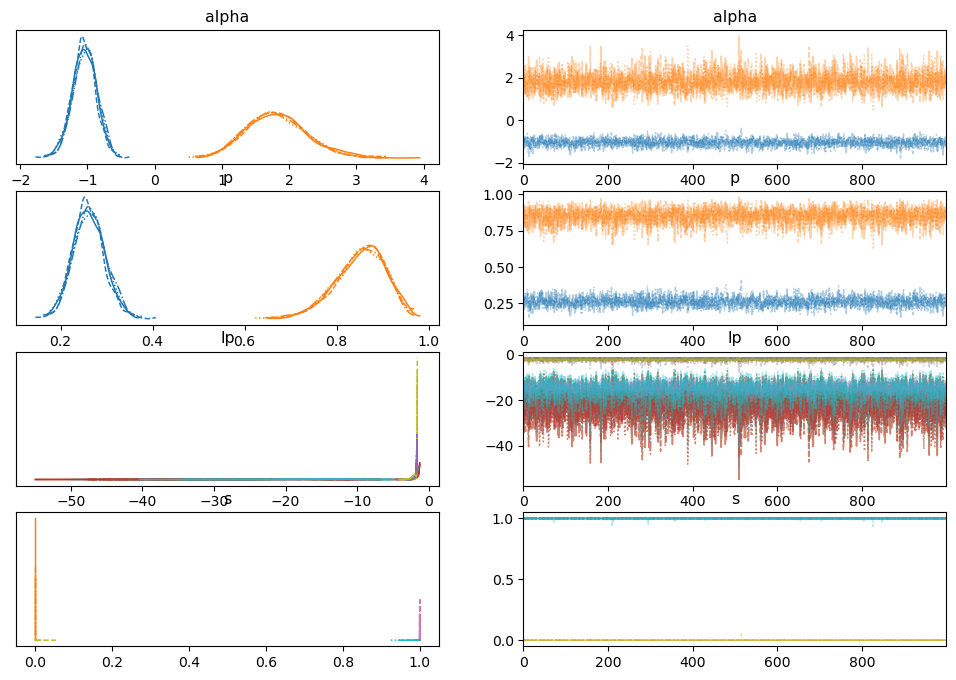

In [8]:
data = {
    'N': 20,
    'K': 10,
    'y': [4, 18, 6, 4, 5, 6, 4, 6, 16, 7],}

fit = model.sample(
    data=data,
    chains=4,
    parallel_chains=4,
    iter_sampling=1000,
    iter_warmup=1000,
)

idata = az.from_cmdstanpy(fit)
az.plot_trace(idata)

In [12]:
az.summary(idata,var_names=["p","s"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],0.262,0.034,0.201,0.329,0.001,0.001,2208.0,2193.0,1.0
p[1],0.851,0.054,0.749,0.946,0.001,0.001,2498.0,2366.0,1.0
s[0],1.000,0.000,1.000,1.000,0.000,0.000,2502.0,2694.0,1.0
s[1],0.000,0.000,0.000,0.000,0.000,0.000,2022.0,2164.0,1.0
s[2],1.000,0.000,1.000,1.000,0.000,0.000,2680.0,2756.0,1.0
s[3],1.000,0.000,1.000,1.000,0.000,0.000,2502.0,2694.0,1.0
s[4],1.000,0.000,1.000,1.000,0.000,0.000,2643.0,2698.0,1.0
s[5],1.000,0.000,1.000,1.000,0.000,0.000,2680.0,2756.0,1.0
s[6],1.000,0.000,1.000,1.000,0.000,0.000,2502.0,2694.0,1.0
s[7],1.000,0.000,1.000,1.000,0.000,0.000,2680.0,2756.0,1.0


This tells us that we can pretty clearly identify the sick people from this sample, and the underlying probabilities for the binomial processes involved.